In [42]:
import torch
import torchvision.transforms as transforms
from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

In [43]:
model = efficientnet_v2_s(weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1)

In [44]:
print(f"{sum(p.numel() for p in model.parameters())} total parameters in EfficientNetV2")

21458488 total parameters in EfficientNetV2


In [64]:
deer_img = "./images/deer.jpeg"
fox_img = "./images/fox.jpeg"
lion_img = "./images/lion.jpeg"
parrot_img = "./images/parrot.jpeg"

image = mpimg.imread(lion_img)

In [65]:
img_tensor = torch.tensor(image)

In [66]:
img_tensor.shape

torch.Size([3417, 5056, 3])

In [67]:
img_correct_shape = img_tensor.permute(2, 0, 1) # correct shape

In [68]:
# transform used in training
efficientnet_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((384, 384), interpolation=F.InterpolationMode.BILINEAR),
    transforms.CenterCrop(384),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

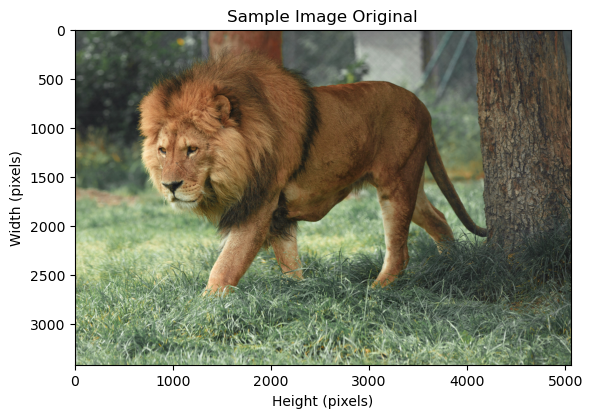

<Figure size 640x480 with 0 Axes>

In [69]:
plt.imshow(img_tensor)
plt.title("Sample Image Original")
plt.xlabel("Height (pixels)")
plt.ylabel("Width (pixels)")
plt.show()
plt.clf()

In [70]:
transformed = efficientnet_transforms(img_correct_shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


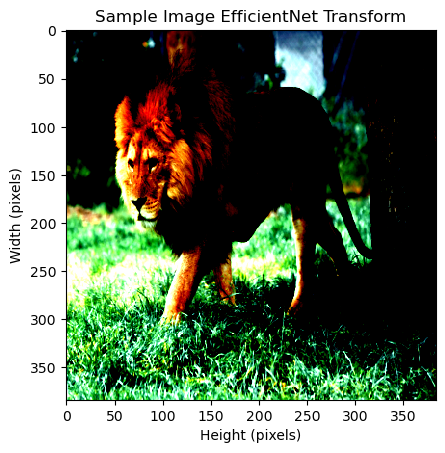

<Figure size 640x480 with 0 Axes>

In [71]:
plt.imshow(transformed.permute(1, 2, 0), interpolation="nearest")
plt.title("Sample Image EfficientNet Transform")
plt.xlabel("Height (pixels)")
plt.ylabel("Width (pixels)")
plt.show()
plt.clf()

In [72]:
transformed.shape

torch.Size([3, 384, 384])

In [73]:
model.eval()
pred = model(transformed.unsqueeze(dim=0))

In [74]:
pred

tensor([[-1.0875e-01, -2.4584e-01,  4.5169e-01,  1.8096e-01,  3.8174e-03,
         -1.0246e-01, -1.7451e-01, -3.7816e-01,  7.1154e-03, -6.1704e-01,
         -1.4771e-01,  1.1272e-01, -2.0025e-01,  1.1883e-01, -5.6818e-02,
         -2.5707e-04,  9.7134e-02,  1.6965e-01, -1.7125e-01,  2.6264e-01,
          1.2025e-04, -3.3141e-01, -1.7233e-01,  2.5255e-01, -7.3340e-01,
         -2.1859e-02,  7.9146e-02, -5.6540e-02, -2.4407e-01,  2.9439e-01,
         -2.4524e-02,  3.7942e-03,  7.6998e-02,  5.0816e-01,  1.9902e-02,
          1.3721e-01, -8.1026e-02, -2.6462e-01,  2.3352e-02, -7.6914e-02,
         -1.9652e-01, -4.4512e-01, -1.0470e-01, -3.5864e-01,  8.3863e-02,
          4.6387e-02, -1.3958e-01, -1.6739e-01,  1.9924e-01,  5.3334e-01,
         -4.7918e-02, -8.2727e-02,  2.4623e-02,  4.8750e-01, -7.9854e-02,
          1.4075e-01, -1.1626e-01,  2.8060e-01,  2.9115e-01,  3.8104e-01,
          3.5320e-01, -1.6203e-01,  1.3756e-01,  7.6211e-02, -4.9916e-03,
          2.8452e-01,  1.6384e-02, -2.

In [75]:
result = torch.sort(pred.softmax(dim=1), descending=True)

In [76]:
result

torch.return_types.sort(
values=tensor([[8.0368e-01, 1.9982e-03, 1.0629e-03, 8.4325e-04, 8.0935e-04, 7.9482e-04,
         7.8458e-04, 7.4910e-04, 5.2670e-04, 5.0477e-04, 4.9373e-04, 4.8428e-04,
         4.7021e-04, 4.6410e-04, 4.6141e-04, 4.3190e-04, 4.2417e-04, 4.2316e-04,
         4.1730e-04, 4.1281e-04, 3.8845e-04, 3.8808e-04, 3.8744e-04, 3.8610e-04,
         3.8442e-04, 3.8079e-04, 3.6057e-04, 3.5391e-04, 3.4682e-04, 3.4671e-04,
         3.4386e-04, 3.4001e-04, 3.3940e-04, 3.3875e-04, 3.3757e-04, 3.3564e-04,
         3.3240e-04, 3.3147e-04, 3.3004e-04, 3.2994e-04, 3.2783e-04, 3.2536e-04,
         3.2425e-04, 3.2108e-04, 3.2038e-04, 3.1890e-04, 3.1701e-04, 3.1683e-04,
         3.1663e-04, 3.1639e-04, 3.1174e-04, 3.1056e-04, 3.0895e-04, 3.0264e-04,
         3.0263e-04, 3.0014e-04, 3.0013e-04, 2.9999e-04, 2.9981e-04, 2.9979e-04,
         2.9898e-04, 2.9721e-04, 2.9584e-04, 2.9566e-04, 2.9467e-04, 2.9369e-04,
         2.9304e-04, 2.9276e-04, 2.9252e-04, 2.9199e-04, 2.8884e-04, 2.8826e-

In [77]:
probabilities = torch.Tensor.tolist(result.values * 100)

In [78]:
probabilities = probabilities[0] # Getting rid of extra dim

In [79]:
indices_list = torch.Tensor.tolist(result.indices)[0]

In [80]:
import json
with open("imagenet_class_index.json", "r") as f:
    class_dict = json.load(f)
classes = ([value[1] for value in class_dict.values()])

In [81]:
probabilities

[80.36846160888672,
 0.19982407987117767,
 0.10629157721996307,
 0.08432494848966599,
 0.0809350535273552,
 0.07948161661624908,
 0.07845784723758698,
 0.07490988075733185,
 0.05267046019434929,
 0.05047670006752014,
 0.049373168498277664,
 0.048428479582071304,
 0.0470210425555706,
 0.04640956595540047,
 0.04614124447107315,
 0.04319038987159729,
 0.04241706803441048,
 0.04231581464409828,
 0.04172968864440918,
 0.04128080606460571,
 0.038845375180244446,
 0.03880760818719864,
 0.03874409571290016,
 0.03861014544963837,
 0.0384422205388546,
 0.0380789116024971,
 0.03605708107352257,
 0.03539135307073593,
 0.03468210622668266,
 0.03467109426856041,
 0.03438578173518181,
 0.03400114178657532,
 0.03394041210412979,
 0.03387545049190521,
 0.03375746309757233,
 0.03356408700346947,
 0.0332404263317585,
 0.033147215843200684,
 0.03300413489341736,
 0.032993968576192856,
 0.03278293088078499,
 0.03253608196973801,
 0.03242500126361847,
 0.03210806846618652,
 0.03203796222805977,
 0.031890347

In [82]:
print(f"Model is {probabilities[0]:4f}% sure image is a {classes[indices_list[0]]}")

Model is 80.368462% sure image is a lion
